## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [3]:
import pandas as pd
apps_with_duplicates = pd.read_csv(r'E:\cde\Module_01(Python)\CDE-B3-SH-main\projects\apps.csv')
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ', apps.shape[0])
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                                         App       Category  \
2402        3093                               NASCAR MOBILE         SPORTS   
3402        4289               KDRAMA Amino for K-Drama Fans         SOCIAL   
3930        4871                                A-B repeater  VIDEO_PLAYERS   
4492        5455                         Access Point Finder      LIFESTYLE   
464          534  Gay Sugar Daddy Dating & Hookup – Sudy Gay         DATING   

      Rating  Reviews  Size    Installs  Type Price Content Rating  \
2402     4.2    80900  21.0  1,000,000+  Free     0       Everyone   
3402     4.6     4046  63.0    100,000+  Free     0           Teen   
3930     4.4       32   0.2      5,000+  Free     0       Everyone   
4492     4.0       22   2.5     10,000+  Free     0       Everyone   
464      4.1     2212  41.0    100,000+  Free     0     Mature 17+   

                       Genres       Last Updated Current Ver

In [4]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [5]:
import numpy as np
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


In [8]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
num_apps_in_category = apps['Category'].value_counts()
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)
data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]
plotly.offline.iplot(data)

Number of categories =  33


In [11]:
avg_app_rating = apps['Rating'].sum() / apps['Rating'].count()
print('Average app rating = ', avg_app_rating)
data = [go.Histogram(
    x = apps['Rating']
)]
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }
plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


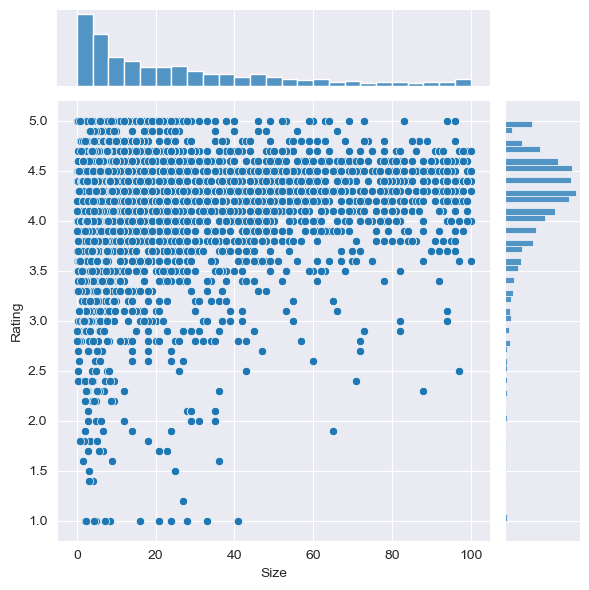

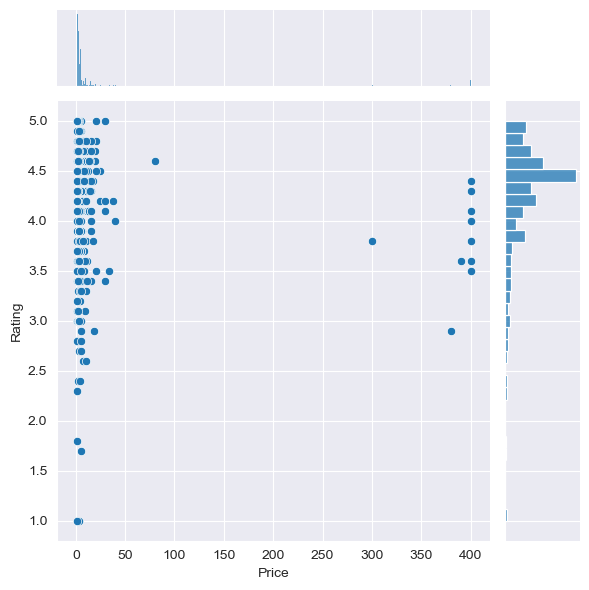

In [10]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
apps_with_size_and_rating_present = apps[apps['Rating'].notnull() & apps['Size'].notnull()]
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


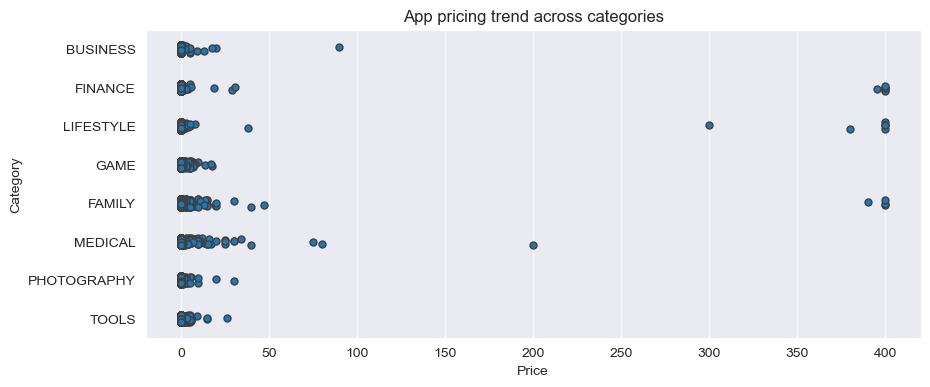

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

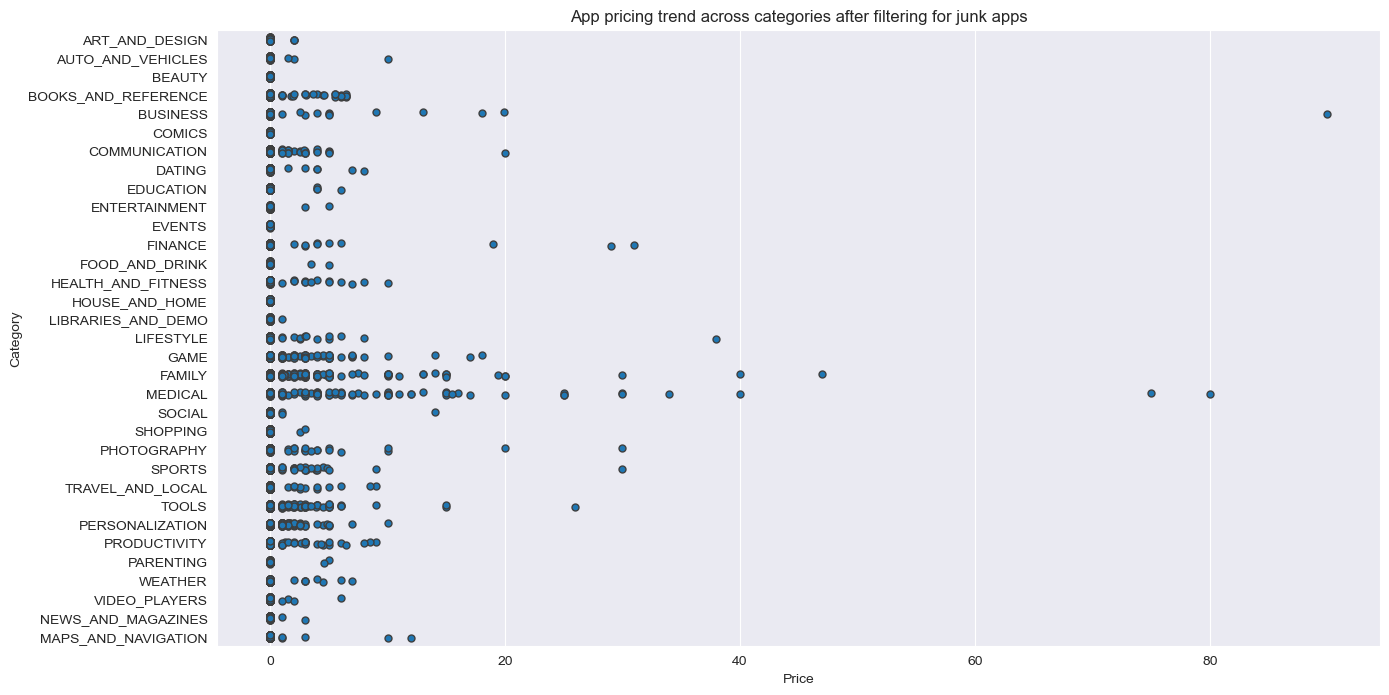

In [13]:
apps_under_100 = apps[apps['Price'] < 100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [14]:
trace0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)
trace1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)
layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

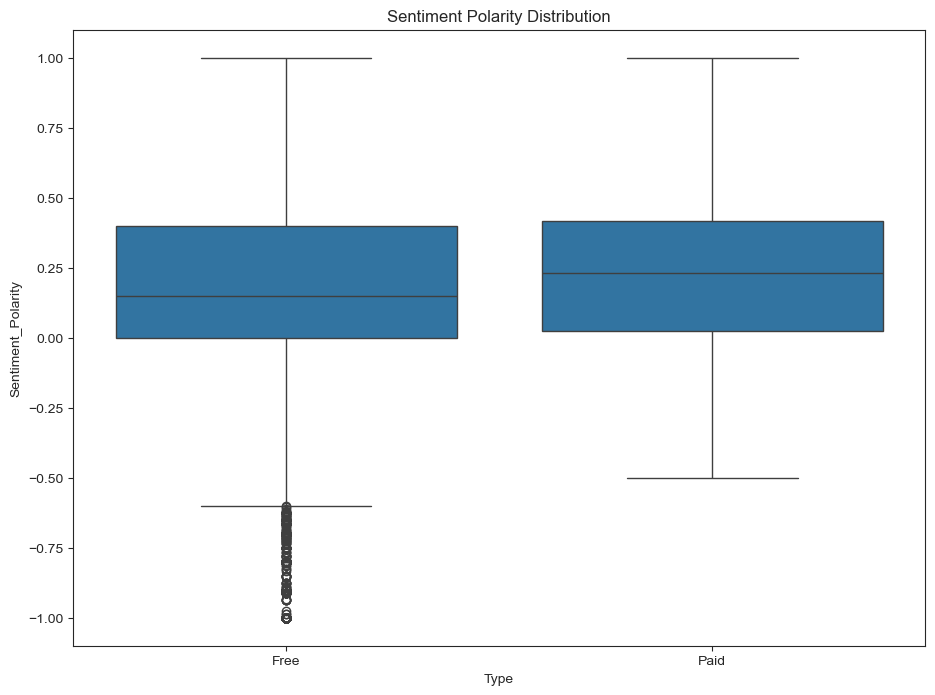

In [17]:
reviews_df = pd.read_csv(r'E:\cde\Module_01(Python)\CDE-B3-SH-main\projects\user_reviews.csv')
merged_df = pd.merge(apps, reviews_df, on='App', how='inner')
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')